<span style="font-size: 22pt; color: steelblue; font-weight: bold">WORK IN PROGRESS</span>

Decision trees are the supervised machine learning algorithm

it's ok to mix data types in classification trees  
final classifications can be repeated  
numerical values can appear multiple times with different thresholds 
usually it is assumed that if the statement is true you go to the left and if the statement is true you go to the right  
the very toop of the tree is called the root node, or just the root  
node where decisions are made called internal nodes or branches, branches have arrows pointing to and from them  
leaves are the node which have arrows pointing to them, but no arrows pointing away from them  

To decide on the root node - we calculate and compare gini impurity for all features / target and pick the one with the least impurity

how to make the split if there are more than two categories in the feature

**How to chose best root node?**  
Greedy approach (saves time, compute and provides acceptable results)  
best root node is selected either based on
1. Gini impurity **CART** algo
    - Choose one with the LEAST IMPURITY
    - Gini impurity only makes binary decisions == 2 splits only at each branch 
2. Entropy + information gain **ID3** algo
    - Information gain = Etropy(before) - Entropy(after)
    - Choose one with the MOST INFORMATION GAIN
    - Entropy can make more than binary decisions 2 + splits at each branch

**how does the tree make decisions based on continuous variable**
To make decisions based on the continuous variable:
1. First – sort the values in the numerical column
2. Calculate averages between all adjacent values
3. Compute Gini impurity or Information Gain like if the splits were made based on each avg. value calculated at previous step
    - Choose the one which results in least Impurity or highest Information Gain

1. firstly choose the best feature to be the root node
2. split the dataset
3. repeat
4. stop when leaves are pure


**Choosing a Root Node: Gini Impurity and Entropy**

**Gini Impurity:**
Gini impurity measures the probability of a randomly chosen element being misclassified, which ranges from 0 (perfectly pure) to 0.5 (maximum impurity).

**Formula:**
For a given node with classes $C_1, C_2, ..., C_k$ and corresponding class probabilities $p_1, p_2, ..., p_k$, the Gini impurity ($I_{\text{Gini}}$) is calculated as follows:
$$I_{\text{Gini}} = 1 - \sum_{i=1}^{k} p_i^2$$

**Example:**
Consider a dataset with two classes, A and B. Let's assume the probabilities of class A and class B are $p_A = 0.6$ and $p_B = 0.4$, respectively.

Calculating the Gini impurity:
$$I_{\text{Gini}} = 1 - (p_A^2 + p_B^2) = 1 - (0.6^2 + 0.4^2) = 0.48$$

**Entropy:**
Entropy measures the disorder or uncertainty in a dataset, ranging from 0 (perfectly ordered) to 1 (maximum disorder).

**Formula:**
For the same node with classes $C_1, C_2, ..., C_k$ and corresponding class probabilities $p_1, p_2, ..., p_k$, the entropy ($H$) is calculated as follows:
$$H = -\sum_{i=1}^{k} p_i \log_2(p_i)$$

**Example:**
Using the same dataset as before, with $p_A = 0.6$ and $p_B = 0.4$:

Calculating the entropy:
$$H = - (p_A \log_2(p_A) + p_B \log_2(p_B)) = - (0.6 \cdot \log_2(0.6) + 0.4 \cdot \log_2(0.4)) \approx 0.971$$

**Selecting the Root Node:**
The root node is selected based on the attribute that maximally reduces impurity or entropy when split. The process involves calculating the impurity or entropy for each attribute and finding the attribute that provides the greatest reduction.

**Example Scenario:**
Suppose we have a dataset with two attributes, Age and Income, and a binary classification problem (Yes or No). We want to choose the root node for the decision tree using Gini impurity and entropy.

1. Calculate the Gini impurity or entropy for each attribute split.
2. Choose the attribute that results in the greatest reduction in Gini impurity or entropy.
3. Set the chosen attribute as the root node, and continue building the tree recursively.

**Conclusion:**
Choosing the root node in a decision tree involves calculating Gini impurity or entropy for potential attribute splits and selecting the attribute that leads to the highest reduction in impurity or entropy. This selection process forms the foundation for building the tree and making subsequent splits.


In [33]:
import pandas as pd
data_dict = {'sex': ['male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female'],
             'does_sports': ['no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no'],
             'age': [17, 36, 21, 35, 31, 30, 33, 24, 33, 19],
             'overweight': ['no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data_dict)
display(df)

,sex,does_sports,age,overweight
0,male,no,17,no
1,female,no,36,yes
2,male,yes,21,no
3,male,no,35,yes
4,female,yes,31,no
5,male,yes,30,no
6,male,no,33,yes
7,male,yes,24,no
8,female,no,33,yes
9,female,no,19,no


Worked example building decision tree based on Gini Impurity

# Deciding on the Root_node

### "sex" feature

In [51]:
df.groupby(['sex', 'overweight']).overweight.count()

sex     overweight
female  no            2
        yes           2
male    no            4
        yes           2
Name: overweight, dtype: int64

first we decide on the root node, for this we build depth 1 trees for each feature and compute the weighted Impurity of resulting leaves

To compute Gini Impurity : $I_{\text{Gini}} = 1 - \sum_{i=1}^{k} p_i^2$:
1. First we build a tree with each feature ...
2. Compute the Gini impurity for each leaf
3. Compute the weighted average Gini impurity between two leaves.

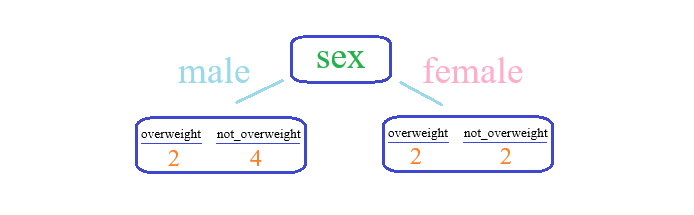

Probability $p_i$ from the formula corresponds to the probability of a person being male AND being overweight or not, and so on.

To compute weighted average Gini impurity between leaves we compute the corresponding weights for each leaf, multiply it by the gini impurity for that same leaf sum the results
- weights are calculated as the proportion of number of elements in a leaf to the total number of elements in the both leaves.

In [31]:
gini_male = 1 - (2 / (2 + 4))**2 - (4 / (2 + 4))**2
gini_female = 1 - (2 / (2 + 2))**2 - (2 / (2 + 2))**2
weighted_avg_gini_sex = (6/10) * gini_male + (4/10) * gini_female
print(f' Gini Impurity for the "male" in "sex" feature: {round(gini_male, 3)}')
print(f' Gini Impurity for the "female" in "sex" feature: {round(gini_female, 3)}')
print(f' Weighted average Gini Impurity for the "sex" feature: {round(weighted_avg_gini_sex, 3)}')

 Gini Impurity for the "male" in "sex" feature: 0.444
 Gini Impurity for the "female" in "sex" feature: 0.5
 Weighted average Gini Impurity for the "sex" feature: 0.467


### "does_sports" feature

In [50]:
df.groupby(['does_sports', 'overweight']).overweight.count()

does_sports  overweight
no           no            2
             yes           4
yes          no            4
Name: overweight, dtype: int64

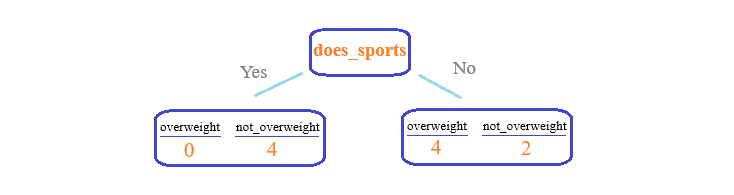

In [43]:
gini_sport = 1 - (0 / (0 + 4))**2 - (4 / (0 + 4))**2
gini_no_sport = 1 - (4 / (4 + 2))**2 - (2 / (4 + 2))**2
weighted_avg_gini_sport = (4 / 10) * gini_male + (6 / 10) * gini_female
print(f' Gini Impurity for the "yes" in "does_sports" feature: {round(gini_sport, 3)}')
print(f' Gini Impurity for the "no" in "does_sports" feature: {round(gini_no_sport, 3)}')
print(f' Weighted average Gini Impurity for the "does_sports" feature: {round(weighted_avg_gini_sport, 3)}')

 Gini Impurity for the "yes" in "does_sports" feature: 0.0
 Gini Impurity for the "no" in "does_sports" feature: 0.444
 Weighted average Gini Impurity for the "does_sports" feature: 0.478


### "age" feature

To analyze continuous variable if it is suited to be the root nood - first we have to sort the values in the column and the compute the average between two adjacent observation and then compute gini impurity for each value and then pick the one with the least value to compare it with other splits 

First lets sort the values and compute the averages.

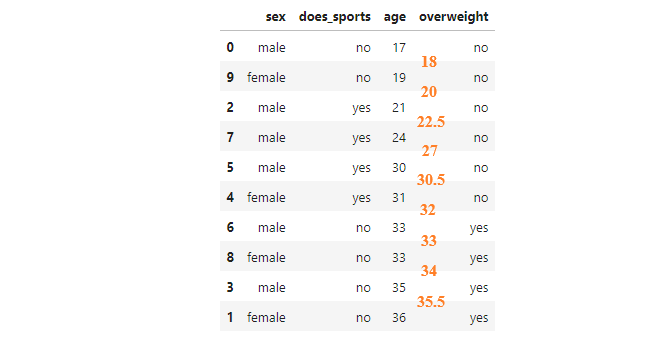

Next we build splits for each avg. value.:
- If age is less than avg value - it goes to the left "yes", 
- if above - to the right "no" split

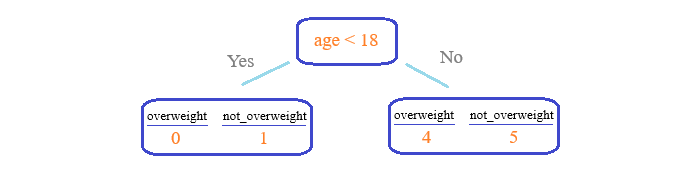